<h1>Research Question</h1>
Can we reliably predict a county's electric vehicle (EV) registrations based off of vehicles' model year, vehicle type, electric range, income, and population in Washington State?

**Research Significance**

Predicting EV registrations at the county level in Washington State is crucial for supporting the state’s climate goals, optimizing infrastructure investments, and addressing equity in transportation. As the transportation sector accounted for the largest portion [(28%) of total U.S. greenhouse gas emissions in 2022](https://www.epa.gov/greenvehicles/fast-facts-transportation-greenhouse-gas-emissions), understanding adoption patterns enables policymakers to strategically allocate resources like EV incentives and charging stations. Accurate predictions ensure that areas with high potential adoption rates are adequately prepared while identifying underserved communities where economic or infrastructural barriers may limit EV access.

Research by [Muehlegger and Rapson (2020)](https://www.erichmuehlegger.com/Working%20Papers/MR_Mass_EV_Adoption.pdf) highlights the significant role financial incentives and income levels play in EV adoption, emphasizing the importance of analyzing socioeconomic factors. Similarly, [Hardman et al. (2018)](https://www.researchgate.net/publication/324476046_A_review_of_consumer_preferences_of_and_interactions_with_electric_vehicle_charging_infrastructure) underscore how vehicle attributes like electric range and the availability of charging infrastructure directly influence consumer decisions, reinforcing the need to include these characteristics in predictive models. By drawing on these insights, this study bridges the gap between theoretical understanding and practical applications in sustainable transportation.

Over- or underestimating EV adoption could lead to misallocated resources, inadequate grid preparation, and stalled progress toward emission reduction targets. Furthermore, insights from this research can guide manufacturers in aligning vehicle designs with regional demand, fostering broader market adoption. By combining factors like income, population, and vehicle attributes, this study provides actionable insights that inform critical decisions impacting economic equity, infrastructure development, and Washington State’s transition to a more sustainable transportation system.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

import statsmodels.api as sm 

## Data Description
***Electric Vehicle Registration Dataset:***

We are using a dataset that shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). It provides key observations representing individual entries, such as specific counties or regions, and attributes like country name, year, the total number of electric vehicles, and types of vehicles (e.g., Battery Electric Vehicles (BEVs) or Plug-in Hybrid Electric Vehicles (PHEVs)).  A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle in to an electric power source. A Plug-in Hybrid Electric Vehicle (PHEV) is a vehicle that uses one or more batteries to power an electric motor; uses another fuel, such as gasoline or diesel, to power an internal combustion engine or other propulsion source; and is charged by plugging the vehicle in to an electric power source. This dataset was created to support the analysis of global trends and distributions in the electric vehicle market, assisting researchers, policymakers, and market analysts in understanding the growth and impact of EVs globally. 

The dataset consists of several columns representing various attributes related to each electric vehicle, including: VIN: Vehicle Identification Number (the first 10 characters; vehicles can have same or similar first 10 characters for their VIN); County: The county where the vehicle is registered; City: The city where the vehicle is registered; State: The state (WA for Washington); Postal Code: The postal code of the registration; Model Year: The year the vehicle model was manufactured; Make: The manufacturer brand of the vehicle; Model: The model of the vehicle. Each row in the dataset describes a specific electric vehicle that is registered in Washington State. Data relating to individual's electric vehicle registrations were utilized. However, there is no indication whether the people were aware of their data being used in this dataset.  

The Washington State Department of Licensing funded the creation of the [original dataset](https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/about_data), meaning the availability of government or private sector EV registration databases likely influenced the collection process. Additionally, the dataset was preprocessed by the author, reflecting updates to county assignment processes, implemented to improve the accuracy of registrations. Monthly vehicle counts per county may vary between reports as a result of these adjustments. The dataset's preprocessing likely involved standardizing the data for vehicle type, registration location, and eligibility attributes.

* Kaggle Link: https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-population
* Official Link: https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/about_data

***Median Household Income Dataset:***

This dataset contains the median income for each county from 1989 to 2023. Each row represents a specific county in Washington State, observed for the years from 1989 to 2023, including preliminary estimates for 2022 and projections for 2023. The estimation for median income for each county relies on both 1990 and 2000 census data. The estimates are also based on past relationships between available socioeconomic data and county-level median household income. The columns include county names, years, and their corresponding median household income estimates expressed in current dollars. Additional metadata might include notes about estimation revisions or socio-economic variables influencing the data. 

This dataset was created to provide a consistent time-series estimation of median household income at the county level in Washington State. It helps track economic trends, guide policy-making, and evaluate the economic well-being of residents at a granular level​. The dataset's development is part of the activities of the Washington State Office of Financial Management (OFM). It is likely funded through state resources allocated for economic and labor force research, consistent with the OFM's mandate​.

Several processes likely influenced this dataset:
* Census Data: Income estimation relies on data from the 1990 and 2000 Census, creating potential biases tied to data collection methods and demographic reporting.
* Socioeconomic Variables: Relationships between income and socioeconomic factors like employment and education were modeled to create estimates.
* Data Availability: Limitations in small-county data can lead to large variations, as mentioned in the documentation.

The dataset was preprocessed to align with the methodological framework of the OFM. It likely involved:
* Normalization: Adjusting income figures to reflect current dollars.
* Estimation Methods: Modeling based on historical relationships with socioeconomic data.
* Projections: Applying statistical techniques for forward-looking income estimates​

Additionally, this dataset differs from other income data sources, such as the Office of Financial Management's State Population Survey or Bureau of the Census surveys, which collect direct responses from individuals. Instead of incorporating survey responses—subject to sampling variability and response bias—this dataset uses modeled estimates. While this approach ensures consistency and reduces variability, it may not capture more recent trends or datailed nuances that surveys provide. As a result, the dataset prioritizes stability and long-term trend accuracy over the immediacy or specificity of survey-based data.

People involved in the census and data reporting processes would likely be aware that their information contributes to aggregate datasets like this. The expected use includes policy development, economic planning, and public information dissemination. However, the dataset's secondary users, such as researchers or policymakers, may apply the data for broader or unforeseen purposes beyond its initial scope. The website did not indicate any preprocessing was done. 

Official Link: https://ofm.wa.gov/washington-data-research/economy-and-labor-force/median-household-income-estimates

***Population Dataset:***

This dataset contains the population for each county in Washington State. Each row of the dataset either represents Washington State, a specific county, or a specific city within a county. There are columns, County, to represent the county the specific county or city is a part of. There is a column named Jurisdiction that represents the governing authority, region, or administrative division. 
 
The dataset was created to provide accurate intercensal and postcensal population estimates for the state of Washington and its counties and cities. It serves as a resource for government agencies, researchers, and policymakers to track demographic changes over time and inform decision-making processes. 

The dataset was developed and maintained by Washington State's Office of Financial Management (OFM). Funding likely comes from the state's budget allocated to demographic research and statistical analysis initiatives. Population data is derived from a combination of census data, administrative records, and statistical modeling. Factors such as the availability of up-to-date records, the accuracy of census data, and the interpolation methods used for intercensal estimates could influence the dataset. Small or rural areas might experience less frequent updates or larger errors due to limited data sources.

The website did not indicate any preprocessing was done. The data is estimated using actual census data from both earlier and later censuses. Population data primarily relies on public census records, which are collected through self-reported surveys where respondents are informed about the purpose of the data collection. Residents likely expected the data to be used for public policy, planning, and research purposes. 

Official Link: https://catalog.data.gov/dataset/waofm-april-1-population-by-state-county-and-city-1990-to-present

## Data Cleaning

For the electric vehicle registration dataset, we moved column '2020 Census Tract' and 'Vehicle Location' since these columns would not be needed for our analysis. We deleted any rows that had missing data, so it does not affect our data analysis. 

In [2]:
df = pd.read_csv('Combined_Data.csv', encoding='ISO-8859-1')
print(df.shape)
df.head()

(77114, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,income_2023,population_2023
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),119926.0,2347800.0
1,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),119926.0,2347800.0
2,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),119926.0,2347800.0
3,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2.0,122057736,PUGET SOUND ENERGY INC,91522.0,303400.0
4,1N4AZ0CP2D,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,14.0,150126840,PACIFICORP,65167.0,261200.0


We decided to aggregate the dataset by county. Since each row in the dataset represents an electric vehicle registered in a county, we created a dataframe that groups the dataset by county. The query below counts up the total EV registrations for each county and the average electric range and EV model year for each county. We found the most popular EV brand, EV model, and EV type (BEV vs. PHEV) for each county. We also found the BEV and PHEV counts for each county, as well as the median income and population for each county. We also calculated the BEV proportion for each county. The BEV proportion represents the percentage/proportion of electric vehicles in a county that are BEVs. Utilizing the BEV proportion instead of just using the BEV count might be beneficial, particularly when comparing data across regions with varying total EV adoption levels.

In [3]:
aggregated_df = duckdb.sql("""
    SELECT 
        County,
        COUNT(*) AS "Total EV Count",  -- Total count of all EVs in the county
        AVG("Electric Range") AS "Average Electric Range", -- Average Electric Range in the county
        AVG("Model Year") AS "Average Model Year", -- Average EV Model Year in the county
        MODE("Make") AS "Popular Brand", -- Most popular EV Brand in the county
        MODE("Model") AS "Popular Model", -- Most popular EV model in the county
        MODE("Electric Vehicle Type") AS "Popular EV Type", -- Most popular EV type in the county (BEV or PHEV)
        SUM(CASE WHEN "Electric Vehicle Type" = 'Battery Electric Vehicle (BEV)' THEN 1 ELSE 0 END) AS "BEV Count", 
        -- Count of BEVs
        SUM(CASE WHEN "Electric Vehicle Type" = 'Plug-in Hybrid Electric Vehicle (PHEV)' THEN 1 ELSE 0 END) AS "PHEV Count",  
        -- Count of PHEVs
        AVG("income_2023") AS "Median Income",  -- Median income in the county
        AVG("population_2023") AS "Population",  -- Population in the county
        -- Calculating BEV proportion directly within the query
        SUM(CASE WHEN "Electric Vehicle Type" = 'Battery Electric Vehicle (BEV)' THEN 1 ELSE 0 END) * 1.0 / COUNT(*) AS "BEV Proportion"  
        -- Proportion of BEVs
    FROM df
    GROUP BY County
    ORDER BY County ASC
""").df()
aggregated_df.head()

,County,Total EV Count,Average Electric Range,Average Model Year,Popular Brand,Popular Model,Popular EV Type,BEV Count,PHEV Count,Median Income,Population,BEV Proportion
0,Adams,19,131.842105,2018.105263,TESLA,MODEL 3,Battery Electric Vehicle (BEV),10.0,9.0,64498.0,21200.0,0.526316
1,Alameda,2,131.000000,2020.000000,TESLA,MODEL 3,Battery Electric Vehicle (BEV),1.0,1.0,NaN,NaN,0.500000
2,Albemarle,2,211.500000,2016.000000,TESLA,MODEL 3,Battery Electric Vehicle (BEV),2.0,0.0,NaN,NaN,1.000000
3,Alexandria,2,326.000000,2020.000000,TESLA,MODEL S,Battery Electric Vehicle (BEV),2.0,0.0,NaN,NaN,1.000000
4,Allen,2,121.500000,2017.500000,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),1.0,1.0,NaN,NaN,0.500000


In [4]:
aggregated_df = aggregated_df.dropna()
aggregated_df.head()

,County,Total EV Count,Average Electric Range,Average Model Year,Popular Brand,Popular Model,Popular EV Type,BEV Count,PHEV Count,Median Income,Population,BEV Proportion
0,Adams,19,131.842105,2018.105263,TESLA,MODEL 3,Battery Electric Vehicle (BEV),10.0,9.0,64498.0,21200.0,0.526316
7,Asotin,41,89.414634,2018.975610,TOYOTA,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),17.0,24.0,67820.0,22650.0,0.414634
10,Benton,1120,125.328571,2018.716964,TESLA,MODEL 3,Battery Electric Vehicle (BEV),576.0,544.0,87992.0,215500.0,0.514286
21,Chelan,510,142.231373,2018.533333,TESLA,LEAF,Battery Electric Vehicle (BEV),330.0,180.0,84430.0,81500.0,0.647059
23,Clallam,573,110.722513,2018.186736,CHEVROLET,LEAF,Battery Electric Vehicle (BEV),299.0,274.0,68924.0,78075.0,0.521815


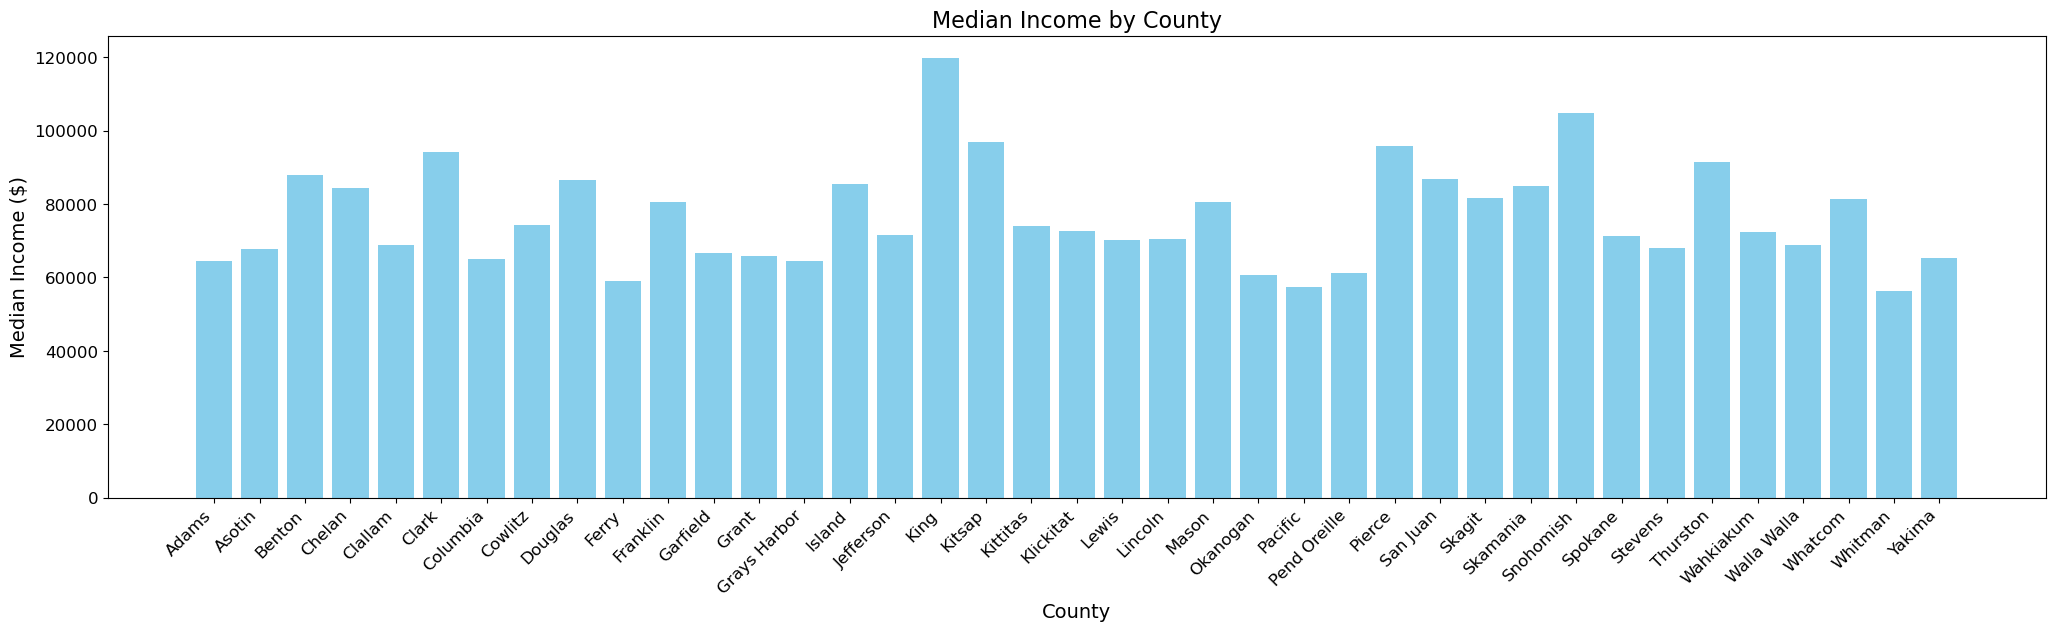

In [5]:
# Bar graph to show median income by county
counties = aggregated_df["County"]
median_income = aggregated_df["Median Income"]
plt.figure(figsize=(25, 6))
plt.bar(counties, median_income, color='skyblue')
plt.title("Median Income by County", fontsize=16)
plt.xlabel("County", fontsize=14)
plt.ylabel("Median Income ($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()

The bar graph displays the median income across various counties. The income levels vary significantly, with some counties like King and Kitsap showing notably higher median incomes compared to others such as Adams and Yakima. This variation highlights potential disparities in wealth distribution across counties, which may correlate with other socioeconomic factors like EV adoption, population density, or infrastructure development. Understanding these income differences is crucial for analyzing patterns in EV registrations or other socioeconomic metrics.

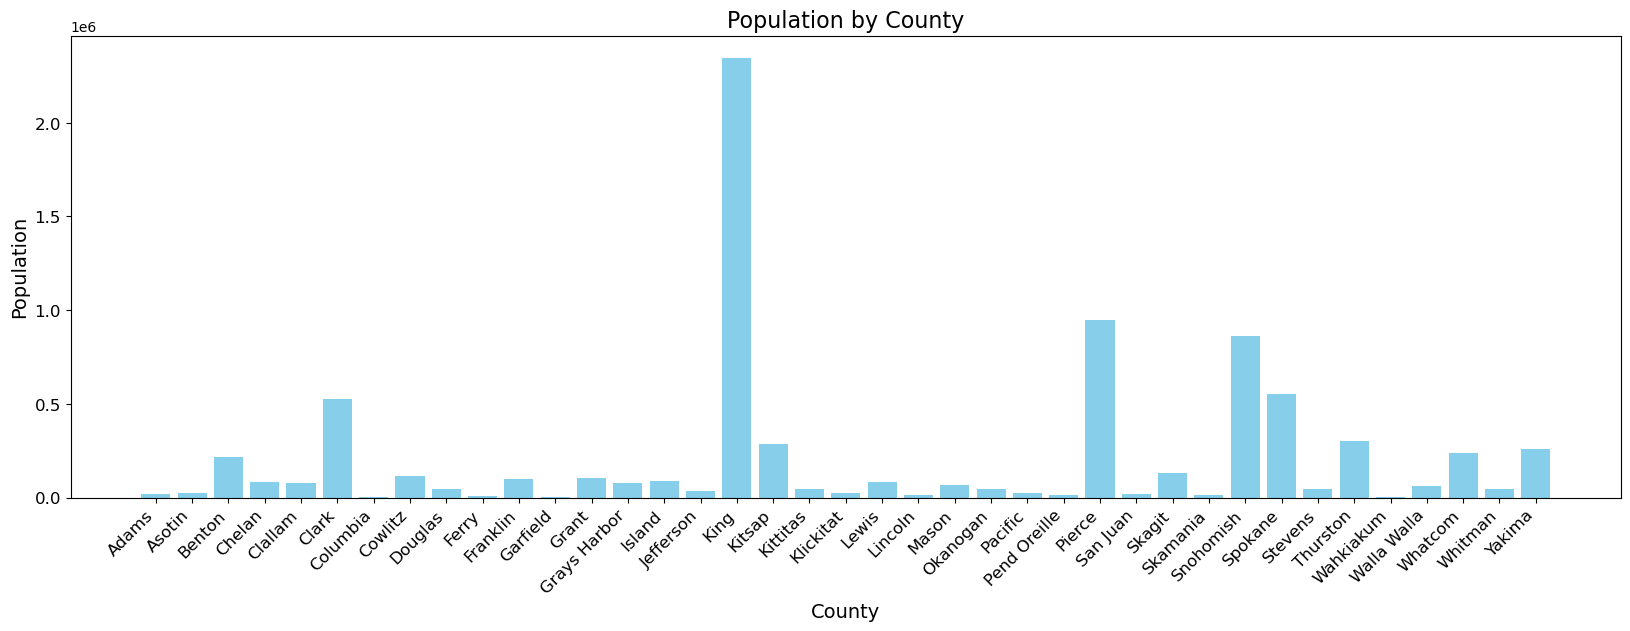

In [6]:
# Bar graph to show population by county
counties = aggregated_df["County"]
median_income = aggregated_df["Population"]
plt.figure(figsize=(20, 6))
plt.bar(counties, median_income, color='skyblue')
plt.title("Population by County", fontsize=16)
plt.xlabel("County", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()

This bar graph shows the population distribution across different counties. King County stands out with a significantly larger population compared to other counties, indicating its role as a major urban and economic hub. Other counties like Pierce, Snohomish, and Spokane also have relatively high populations but are much smaller in comparison to King County. Smaller, rural counties, such as Ferry or Columbia, exhibit much lower population counts. This visualization helps highlight disparities in population density, which may influence infrastructure, resource allocation, and adoption rates of technologies like EVs.

## Pre Registration Statements
### Statement 1
**Hypothesis:** Counties with a higher density of BEVs (Battery Electric Vehicles) relative to other types of EVs have higher total EV registrations.

**Analysis:** We will calculate the proportion of BEVs among all EVs for each county. Then, we will perform a linear regression with the BEV proportion (for each county) as the input variable and the total EV registrations (for each county) as the output. The goal is to test whether the coefficient for BEV proportion indicates a meaningful link between BEV density and overall EV registrations within each county. We chose linear regression because it can detect direct correlations between BEV popularity and overall adoption trends. We will test whether BEV > 0. If it is significantly positive, then it indicates that the counties with higher BEV proportion tend to have more total EV registrations. Additionally, if a relationship exists, it could inform further investigation into socioeconomic or geographic factors that may affect EV adoption rates.

We chose to focus on BEVs (Battery Electric Vehicles) instead of PHEVs (Plug-in Hybrid Electric Vehicles) because BEVs are a more direct indicator of a county's commitment to fully electric transportation, representing a greater shift towards sustainability. BEVs operate exclusively on electricity, making them a better proxy for infrastructure readiness, such as the availability of charging stations and the region's alignment with renewable energy initiatives. In contrast, PHEVs rely on both gasoline and electricity, making them a transitional technology that reflects partial adoption of electric mobility.

The focus on BEVs aligns with broader trends in the automotive industry and climate policy. According to [InsideEVs](https://insideevs.com/news/724181/phev-growth-overtakes-bevs-report/), even though PHEV is slowly gaining popularity, BEV still outnumbers PHEV's sales. Additionally, a report from Grappone Honda [Grappone Honda](https://www.grapponehonda.com/finance/car-buying-tips/bev-vs-phev/#:~:text=Environmental%20Impact%3A%20For%20those%20looking,when%20using%20a%20gasoline%20engine.) highlights that BEVs is the way to go to reduce carbon footprint. However, PHEVs are still more environmentally friendly than conventional cars. By prioritizing BEVs in our analysis, we ensure that the results are more relevant to long-term policy recommendations, infrastructure planning, and insights into counties leading the charge toward full electrification.

In [7]:
# Remove rows where BEV Proportion or Total EV Count is zero or null (to avoid issues in regression)
ev_density_by_county = aggregated_df.dropna(subset=["BEV Proportion", "Total EV Count"])
ev_density_by_county = aggregated_df[aggregated_df["Total EV Count"] > 0]

# Define independent variable (BEV Proportion) and dependent variable (Total EV Count)
X = ev_density_by_county["BEV Proportion"]
y = ev_density_by_county["Total EV Count"]

# Add a constant to the independent variable for the intercept term in the regression model
X = sm.add_constant(X)

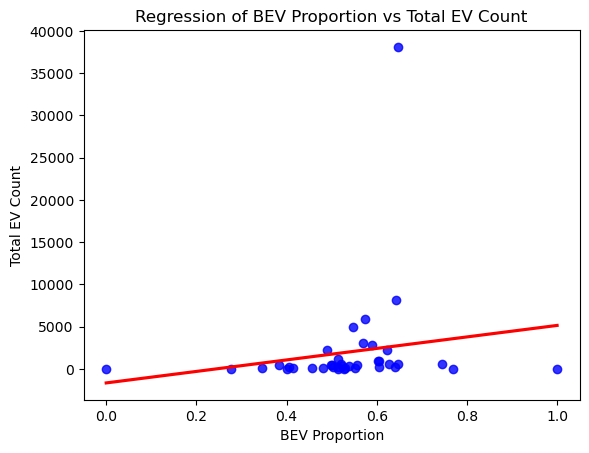

In [8]:
sns.regplot(x="BEV Proportion", y="Total EV Count", data=ev_density_by_county, 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, 
            ci=None)  
plt.xlabel("BEV Proportion")
plt.ylabel("Total EV Count")
plt.title("Regression of BEV Proportion vs Total EV Count")

plt.show()

#### Null and Alternative Hypotheses
Null Hypothesis ($H_0$): The coefficient of BEV Proportion is equal to 0.
This implies that there is no significant relationship between the proportion of Battery Electric Vehicles (BEVs) in a county and the total number of EV registrations.

Alternative Hypothesis ($H_A$): The coefficient of BEV Proportion is not equal to 0.
This implies that there is a significant relationship between the proportion of BEVs in a county and the total number of EV registrations.




In [9]:
# Perform the linear regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total EV Count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.062
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.309
Time:                        18:05:39   Log-Likelihood:                -394.81
No. Observations:                  39   AIC:                             793.6
Df Residuals:                      37   BIC:                             796.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1672.3873   3672.674     -0.

### Interpretation
Since BEV Proportion ranges from 0 to 1, a 1-unit increase means shifting from 0% BEVs to 100% BEVs in a county's EV registrations. According to the regression, all else equal, for every 1-unit increase in BEV proportion (e.g., moving from 0% BEVs to 100% BEVs), the total number of EV registrations increases by approximately 6807.43 vehicles. However, this relationship is not statistically significant (p = 0.309), indicating that we cannot confidently associate changes in BEV proportion with changes in total EV registrations.

### Predictions
When BEV Proportion = 0, 
Total EV Count = -1672.3873 + 6807.4265 $\cdot$ (BEV Proportion) = -1672.3873 + 6807.4265 $\cdot$ 0 = -1672.3873
This suggests that a country with no BEVs would still have 351 EV registrations. 

When BEV Proportion = 1, 
Total EV Count = -1672.3873 + 6807.4265 $\cdot$ (BEV Proportion) = -1672.3873 + 6807.4265 $\cdot$ 1 = 5135.0392
This suggests that a county where all registered EVs are BEVs is expected to have about 5135 total EV registrations.


### Statistical Significance

P-value: Since the test is one-sided, $p = 0.309 / 2 = 0.1545$: The intercept is not statistically significant because it is much greater than the common significance threshold (0.05), meaning we cannot reject the null hypothesis. There is no strong evidence to suggest that the BEV Proportion is significantly associated with Total EV Count.

The R-squared is 0.028, meaning that only 2.8% of the variation in Total EV Count is explained by the BEV Proportion. This indicates a very poor model fit, suggesting that BEV Proportion alone is not a good predictor of Total EV Count

The 95% confidence interval for the BEV Proportion coefficient is [-6576.011, 20200.000]. This wide interval indicates high uncertainty about the true effect of BEV proportion, and the interval includes 0, further supporting the lack of statistical significance.

The high p-value, low R-squared value, and wide confidence interval suggest no statistically significant relationship between BEV Proportion and total EV registrations. The model does not provide strong evidence to support the hypothesis.

We fail to reject the null hypothesis, meaning there is no evidence that the proportion of BEVs is significantly associated with higher total EV registrations. This indicates that BEV density alone is not a reliable predictor of EV registrations in counties.

### Potential Oddities
The coefficient for BEV Proportion is not statistically significant ($p = 0.1545$), meaning the relationship may not be reliable.  
The model predicts fractional and negative EV counts, which are not realistic since EV registrations must be non-negative whole numbers.
Counties with very high BEV proportions (e.g., 100%) might still have relatively few total EV registrations due to small population sizes, making the relationship appear artificially strong or weak depending on the scale of the data.  
The model does not account for counties with zero EV registrations, even if they have a non-zero BEV proportion.  
The relationship assumes linearity with may oversimplify real-world trends in EV adoption.

## Pre Registration Statements
### Statement 2
**Hypothesis:** Counties with higher median incomes are correlated with a greater number of registered electric vehicles.

**Analysis:** As stated in the introduction, research by [Muehlegger and Rapson (2020)](https://www.erichmuehlegger.com/Working%20Papers/MR_Mass_EV_Adoption.pdf) highlights the significant role financial incentives and income levels play in EV adoption, emphasizing the importance of analyzing socioeconomic factors. Therefore, we would analyze the relationship between median income and EV registration counts. Where each row in the dataset represents a different county, we run a linear regression for median income in 2023 as input and the number of registered electric vehicles as output. Because the coefficient can contain signs to indicate a positive or negative relationship between the two variables, we will test whether income  0. If it is significantly positive, then it indicates that high-income countries tend to have more EVs. We will also evaluate the R-squared value to understand how much of the variation in EV registrations is explained by median income and other factors included in the model.

In [10]:
# Filter for non-null data
filtered_df = aggregated_df.dropna(subset=["Median Income", "Population"]).copy()
# Represents number of EVs per 1,000 residents in each county --> adjusted the raw EV count to 
# account for differences in population size across counties
filtered_df["EVs per 1000"] = (filtered_df["Total EV Count"] / filtered_df["Population"]) * 1000
filtered_df.head()

,County,Total EV Count,Average Electric Range,Average Model Year,Popular Brand,Popular Model,Popular EV Type,BEV Count,PHEV Count,Median Income,Population,BEV Proportion,EVs per 1000
0,Adams,19,131.842105,2018.105263,TESLA,MODEL 3,Battery Electric Vehicle (BEV),10.0,9.0,64498.0,21200.0,0.526316,0.896226
7,Asotin,41,89.414634,2018.975610,TOYOTA,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),17.0,24.0,67820.0,22650.0,0.414634,1.810155
10,Benton,1120,125.328571,2018.716964,TESLA,MODEL 3,Battery Electric Vehicle (BEV),576.0,544.0,87992.0,215500.0,0.514286,5.197216
21,Chelan,510,142.231373,2018.533333,TESLA,LEAF,Battery Electric Vehicle (BEV),330.0,180.0,84430.0,81500.0,0.647059,6.257669
23,Clallam,573,110.722513,2018.186736,CHEVROLET,LEAF,Battery Electric Vehicle (BEV),299.0,274.0,68924.0,78075.0,0.521815,7.339097


Text(0.5, 1.0, 'Median Income vs. Total EV Count for Counties')

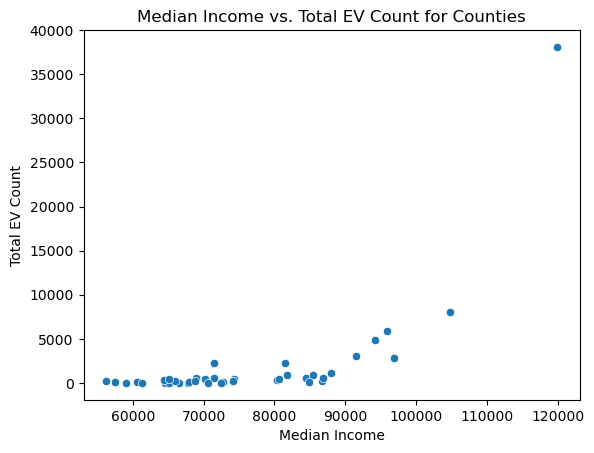

In [11]:
# Scatter plot to compare income and total EV Count for each county
sns.scatterplot(x='Median Income', y = 'Total EV Count', data = filtered_df)
plt.title('Median Income vs. Total EV Count for Counties')

From the scatterplot, we can tell that as average increases, the total EV count does tend to increase too. However counties with median income from 60,000 to 90,000 tends to have similar total EV counts. Counties with income higher than 90,000 tends to have more EV registrations, especially with the county that has an median income of 120,000. This county is Kings County which has one of the highest population count in Washington state, too. This can also indicate that population might play a role in EV registrations count, too.

In [12]:
# Linear regression
X = filtered_df["Median Income"].values.reshape(-1,1)
y = filtered_df["Total EV Count"].values

model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")

print(f"Coefficient for Median Income: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

R-squared: 0.45
Coefficient for Median Income: 0.30
Intercept: -20691.03


The R-square value indicates that 45% of the variation in Total EV Count can be explained by Median Income alone. The relatively modest value indicates that other factors may also play a significant role. The coefficient implies that for every 1 dollar increase in Median Income, the Total EV Count increases by 0.30 vehicles. The intercept represents the predicted Total EV Count when Median Income = 0 dollar. This value doesn't make sense practically (as no county has $0 income), which might indicate limitations in predicting EV registrations for low income counties.

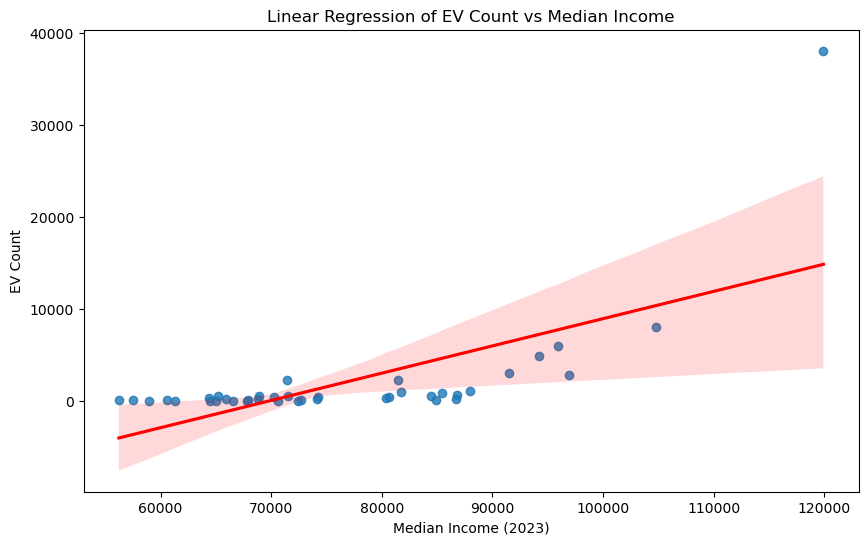

In [13]:
# Plot the regression
plt.figure(figsize=(10, 6))
sns.regplot(x=filtered_df["Median Income"], y=filtered_df["Total EV Count"], line_kws={"color": "red"})
plt.title("Linear Regression of EV Count vs Median Income")
plt.xlabel("Median Income (2023)")
plt.ylabel("EV Count")
plt.show()

This graph shows there is some sort of positive linear relationship between median income (2023) and the total EV count in counties. While the trendline shows a positive correlation, indicating that higher median income is generally associated with higher EV counts, the significant spread and one clear outlier suggest variability in the data and potential influencing factors beyond income.

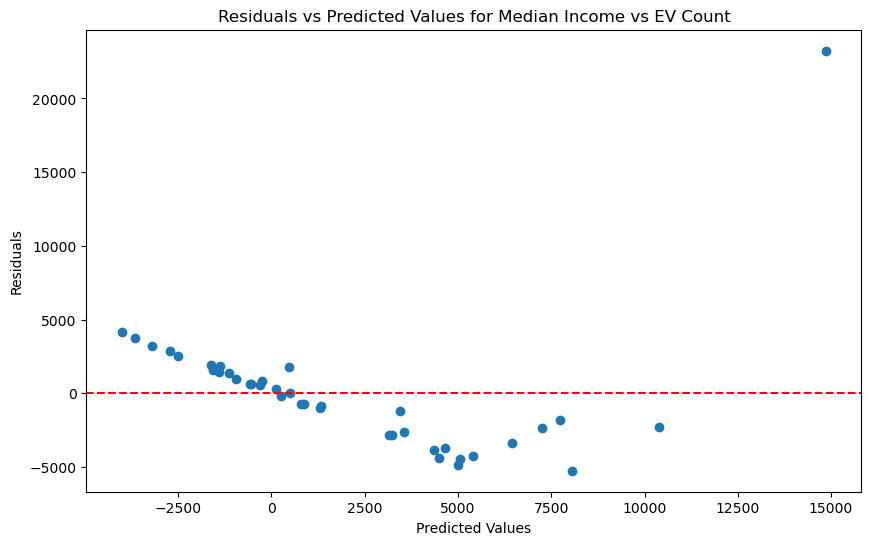

In [14]:
# Plot the residuals
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Median Income vs EV Count') 
plt.show()

The residual indicates some sort of heteroscedasticity. The model's predictions might not be as reliable. To address this, we can apply a log transformation to Total EV Count.

#### Null and Alternative Hypotheses
Null Hypothesis ($H_0$): The coefficient of Median Income is equal to 0.
This implies that there is no significant relationship between the median income of a county and the number of registered EVs.

Alternative Hypothesis ($H_A$): The coefficient of Median Income is not equal to 0.
This implies that there is a significant relationship between the median income of a county and the number of registered EVs.


In [15]:
X_with_const = sm.add_constant(X)  
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     29.94
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.26e-06
Time:                        18:05:39   Log-Likelihood:                -383.80
No. Observations:                  39   AIC:                             771.6
Df Residuals:                      37   BIC:                             774.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.069e+04   4208.483     -4.917      0.0

### Interpretation

There is a statistically significant positive relationship between median income in a county and the total number of EVs registered. According to the regression, for every $1 increase in median income, the total EV count increases by approximately 0.3 vehicles.  

### Predictions
When median income = 0,   
Total EV Count = -20,681.03 + 0.3 $\cdot$ (Median Income) = -20,681.03 + 0.30 $\cdot$ 0 = -20,681.03
This is unrealistic since income and EV registrations cannot be negative, suggesting limitations in the model for low-income counties.

When median income = 100,000,     
Total EV Count =  -20,681.03 + 0.3 $\cdot$ (Median Income) = -20,681.03 + 0.30 $\cdot$ 100,000 = 9,308.97
This prediction suggests that counties with higher incomes (e.g., $100,000 average) could see significant EV registrations.

### Potential Oddities
The model predicts negative EV registrations for counties with very low median income, which is nonsensical and highlights a limitation of using linear regression in this context.  
The model predicts fractional EV registrations, which is unrealistic since EV registrations are discrete values.  
The model assumes a linear relationship between income and EV registrations. However, in reality, the relationship may plateau at very high incomes, as EV adoption might not increase indefinitely with wealth.

Overall, the model has limitations in capturing the complexities of EV adoption trends.

### Statistical Significance
The P-value for Median Income is <0.001. 
The p-value is much less than the commonly used significance threshold (e.g., 0.05). This allows us to reject the null hypothesis. There is strong evidence to suggest a statistically significant relationship between median income and total EV count.

The 95% confidence interval for the Median Income coefficient is [0.187, 0.406]. This interval does not include 0, which confirms the statistical significance of the result.

The R-squared value is 0.447, indicating that approximately 45% of the variation in EV registrations across counties is explained by median income. This indicates that median income is a moderately strong predictor of EV registrations.  
  
The low p-value, moderate R-squared value, and confidence interval suggest a statistically significant positive relationship between median income and EV registrations. Higher-income counties are more likely to have greater numbers of EVs, supporting the hypothesis.

We can reject the null hypothesis and conclude that there is strong evidence to support the hypothesis that counties with higher median incomes have more registered EVs. Median income is a significant predictor of EV registrations.

In [16]:
filtered_df["Log EV Count"] = np.log(filtered_df["Total EV Count"])
X = filtered_df[["Median Income"]]
y = filtered_df["Log EV Count"]

model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")

print(f"Coefficient for Median Income: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

R-squared: 0.55
Coefficient for Median Income: 0.00
Intercept: -2.82


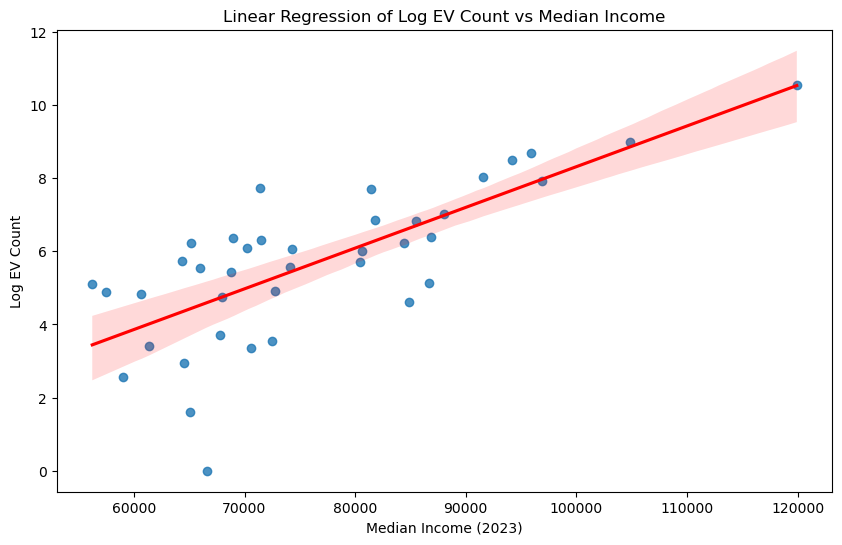

In [17]:
# Plot the regression
plt.figure(figsize=(10, 6))
sns.regplot(x=filtered_df["Median Income"], y=filtered_df["Log EV Count"], line_kws={"color": "red"})
plt.title("Linear Regression of Log EV Count vs Median Income")
plt.xlabel("Median Income (2023)")
plt.ylabel("Log EV Count")
plt.show()

This graph shows the linear regression of the log-transformed EV count against median income (2023), highlighting a stronger and more consistent positive correlation compared to the previous graph with raw EV counts. The log transformation reduces the impact of outliers and heteroscedasticity, creating a more linear relationship. The data points are more evenly distributed around the trendline, and the confidence interval (shaded area) is narrower, reflecting improved model fit and reduced variability. Compared to the earlier graph, this visualization provides a clearer depiction of how increases in median income are associated with proportionate increases in EV adoption. There might potentially be an exponential relationship between median income and total EV count.

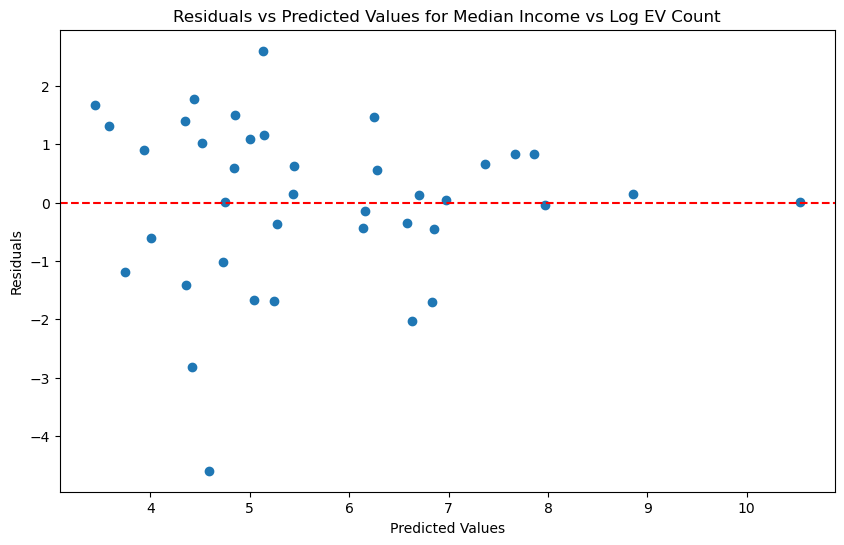

In [18]:
# Plot residual
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Median Income vs Log EV Count') 
plt.show()

Compared to before log transformation, the variance of residuals is now more constant and scattered across the plot. This indicates that the log transformation might have stabilized the variance. Most residuals are distributed fairly evenly around the red dashed line at y = 0, which means the model's predictions are unbiased on average. The linear regression plot indicates a positive relationship between Median Income and the log-transformed EV Count. Since the total EV count is log-transformed, this can indicate that the relationship between income and EV count is exponential. This can indicate that higher incomes are most likely to adopt EVs. It also good to note that even though the points are more scattered now, some sort of cone-shaped pattern is still slightly visible, indicating a log transformation might not have fixed everything. We could look into population to see if any factors could be contributing to this.

### Population's Effect on EV Count
As seen from the scatterplot in the beginning of this section, population might play a role in EV registrations, too. Therefore, we plan to perform a multivariate regression to test whether median income and population plays a role in the number of EV registrations.

In [19]:
# Perform linear regression
filtered_df["Log EV Count"] = np.log(filtered_df["Total EV Count"])
X = filtered_df[["Median Income", "Population"]].values
y = filtered_df["Log EV Count"].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for var, coef in zip(["Median Income", "Population"], coefficients):
    print(f"  {var}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

R-squared: 0.59
Coefficients:
  Median Income: 0.00
  Population: 0.00
Intercept: -0.86


The R-squared value is 0.59, indicating that 59% of the variation in the log-transformed EV count based on the predictors (MedianIncome and Population). Median income's coefficient is 0.00 indictating that a 1-unit increase in Median Income (e.g., $1) corresponds to a proportional change in EV Count that is effectively negligible. This suggests that income, on its own, has a very small effect on proportional changes in EV count when other factors (like population) are considered. Similarly, the coefficient of population is 0.00, indicating the effect of a 1-unit increase in Population (1 additional person) on proportional EV Count is negligible.

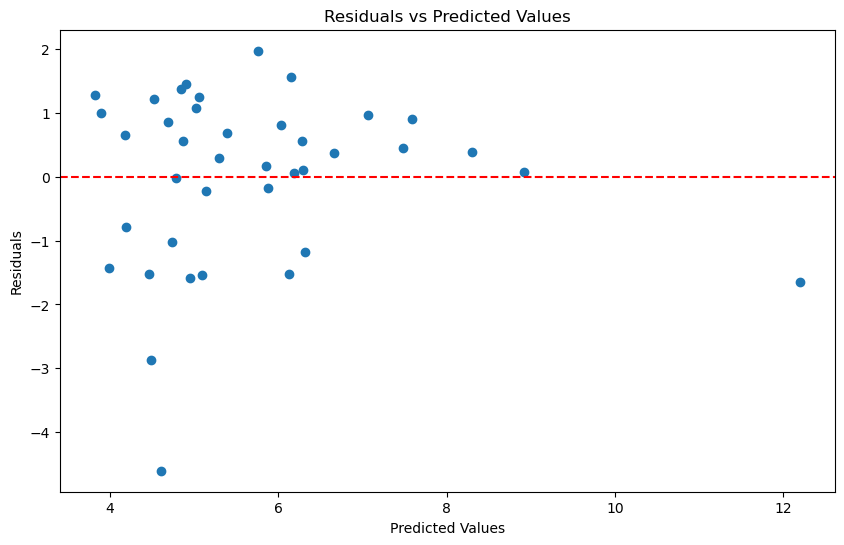

In [20]:
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values') 
plt.show()

The residual is somewhat scattered, indicating there might not be any heteroscedasticity. Based on the values above, median income and population together might not be a good predictor for total EV registrations. We can utilize OLS Regression to obtain more insight.

### Overall Model Hypothesis

Null Hypothesis ($H_0$): None of the variables, Median Income or Population, have a relationship with the output variable, total EV registrations. 

Alternative Hypothesis ($H_A$): At least one of the variables, (Median Income, Population) has a relationship with the output variable, total EV registrations. 

In [39]:
# Define the predictors (independent variables)
X = filtered_df[["Median Income", "Population"]]

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Define the target (dependent variable)
y = filtered_df["Log EV Count"]

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Log EV Count   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     25.42
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.31e-07
Time:                        18:07:37   Log-Likelihood:                -66.546
No. Observations:                  39   AIC:                             139.1
Df Residuals:                      36   BIC:                             144.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8617      1.675     -0.514

In [41]:
f_pvalue = model.f_pvalue
print("F-statistic p-value:" ,round(f_pvalue,10))

F-statistic p-value: 1.305e-07


In [47]:
#Using Bonferroni Correction to look at the p-values for variables separately
alpha = 0.05
num_tests = 2  # 2 variables
adjusted_alpha = alpha / num_tests
corrected_pvalues = model.pvalues[1:] * num_tests
print(corrected_pvalues)


Median Income    0.002237
Population       0.175111
dtype: float64


### Interpretation
The R-squared value is 0.585, indicating 58.5% of the variance in the log-transformed EV Count. This suggests that Median Income and Population together moderately explain the proportional changes in EV adoption across counties. The coefficient of Median Income is 8.207e-05 , suggesting that if median income is increase by $1, then we expect the total EV count to be mulitplied by e^(8.207e-05 ), which equals about 1.   

The F-statistic p-value is 1.305e-07, which is much smaller than the commonly used significance threshold of 0.05. This indicates that we can reject the null hypothesis that none of the predictors (Median Income or Population) have a relationship with the output variable, Log EV Count.
With this, we can conclude that there is strong evidence that at least one of the predictors (Median Income or Population) is significantly related to Log EV Count.  
This result supports the inclusion of these predictors in the regression model, as they collectively explain a significant proportion of the variation in the log-transformed EV registrations across counties.

The Bonferroni correction adjusts for multiple comparisons to reduce the risk of falsely identifying a variable as significant. The significance threshold ($alpha = 0.05$) is divided by the number of tests (num_tests = 2), resulting in an adjusted threshhold of ($a_{adjusted} = 0.025$)  
Median Income:
The corrected $p$-value is 0.002237, which is below the adjusted threshold (0.025). This means Median Income remains statistically significant even after adjusting for multiple comparisons. Thus, there is strong evidence that Median Income has a meaningful positive relationship with EV registrations.  
Population: The corrected $p$-value is 0.175111, which is above the adjusted threshold (0.025). This means Population is $not$ statistically significant after applying the Bonferroni correction. There is insufficient evidence to conclude that Population has a meaningful relationship with EV registrations.

### Normalizing EV Counts
As seen above, median income + population together does not have a huge impact on EV counts. From most of the regression plots and residuals we see, there seems to be clear outliers with counties having a higher population that others. Larger counties would naturally have more vehicles simply because of their size. We can try to normalize EV Counts by dividing each county's Total EV Counts by each county's population. Using per capita values accounts for these differences, providing a more comparable measure across counties. In the code below, we created a new column in our dataframe that represents each county's total EV count per capita (per person).

In [23]:
# Divide each county's EV Count by each county's population
filtered_df["Total EV Count per Capita"] = filtered_df["Total EV Count"] / filtered_df["Population"]
filtered_df

,County,Total EV Count,Average Electric Range,Average Model Year,Popular Brand,Popular Model,Popular EV Type,BEV Count,PHEV Count,Median Income,Population,BEV Proportion,EVs per 1000,Log EV Count,Total EV Count per Capita
0,Adams,19,131.842105,2018.105263,TESLA,MODEL 3,Battery Electric Vehicle (BEV),10.0,9.0,64498.0,21200.0,0.526316,0.896226,2.944439,0.000896
7,Asotin,41,89.414634,2018.975610,TOYOTA,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),17.0,24.0,67820.0,22650.0,0.414634,1.810155,3.713572,0.001810
10,Benton,1120,125.328571,2018.716964,TESLA,MODEL 3,Battery Electric Vehicle (BEV),576.0,544.0,87992.0,215500.0,0.514286,5.197216,7.021084,0.005197
21,Chelan,510,142.231373,2018.533333,TESLA,LEAF,Battery Electric Vehicle (BEV),330.0,180.0,84430.0,81500.0,0.647059,6.257669,6.234411,0.006258
23,Clallam,573,110.722513,2018.186736,CHEVROLET,LEAF,Battery Electric Vehicle (BEV),299.0,274.0,68924.0,78075.0,0.521815,7.339097,6.350886,0.007339
24,Clark,4906,120.988382,2018.681411,TESLA,MODEL 3,Battery Electric Vehicle (BEV),2688.0,2218.0,94198.0,527400.0,0.547901,9.302237,8.498214,0.009302
27,Columbia,5,234.200000,2016.400000,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),5.0,0.0,65040.0,3950.0,1.000000,1.265823,1.609438,0.001266
30,Cowlitz,435,122.981609,2018.790805,TESLA,MODEL 3,Plug-in Hybrid Electric Vehicle (PHEV),217.0,218.0,74250.0,113000.0,0.498851,3.849558,6.075346,0.003850
35,Douglas,170,132.117647,2018.417647,TESLA,LEAF,Battery Electric Vehicle (BEV),103.0,67.0,86676.0,44500.0,0.605882,3.820225,5.135798,0.003820
41,Ferry,13,183.846154,2018.692308,TESLA,MODEL 3,Battery Electric Vehicle (BEV),10.0,3.0,58973.0,7300.0,0.769231,1.780822,2.564949,0.001781


In [24]:
# Linear regression
X = filtered_df["Median Income"].values.reshape(-1,1)
y = filtered_df["Total EV Count per Capita"].values

model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")

print(f"Coefficient for Median Income: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

R-squared: 0.29
Coefficient for Median Income: 0.00
Intercept: -0.01


#### Regression Summary
R-squared: 0.29

This means that 29% of the variation in the EV Count per Capita is explained by Median Income. While this indicates some predictive power, the model leaves 71% of the variation unexplained, suggesting that other factors could significantly influence EV adoption.

Coefficient for Median Income: 0.00

The coefficient being close to 0 indicates that the relationship between Median Income and EV Count per Capita is extremely weak when normalized per capita. This suggests that income may not be a strong driver of EV adoption when the data is adjusted for population size.

Intercept: -0.01

The intercept of -0.01 implies that when Median Income is 0 (an unrealistic scenario), the EV Count per Capita would be negative. This is mathematically possible in the model but does not make real-world sense because EV count per capita cannot be negative.

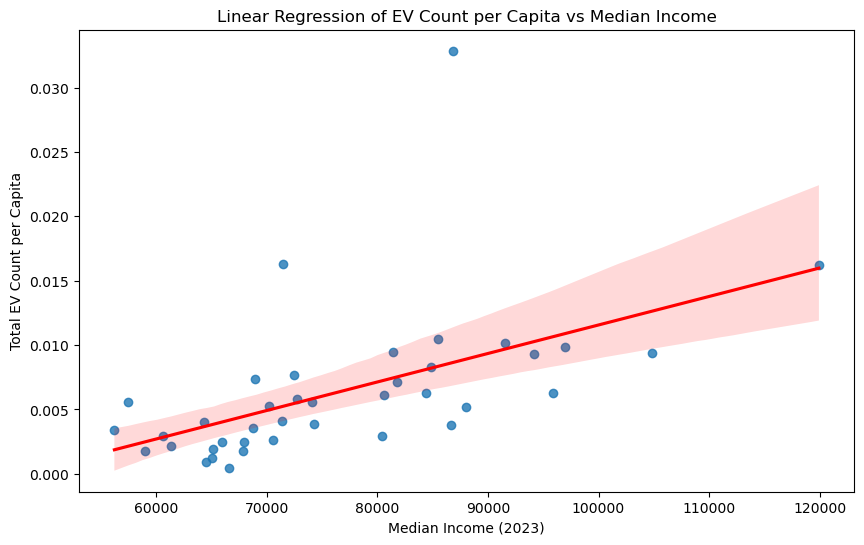

In [25]:
# Plot the regression
plt.figure(figsize=(10, 6))
sns.regplot(x=filtered_df["Median Income"], y=filtered_df["Total EV Count per Capita"], line_kws={"color": "red"})
plt.title("Linear Regression of EV Count per Capita vs Median Income")
plt.xlabel("Median Income (2023)")
plt.ylabel("Total EV Count per Capita")
plt.show()

In [26]:
# To find the outlier within this plot
max_ev_per_capita_row = filtered_df.loc[filtered_df["Total EV Count per Capita"].idxmax()]
print(max_ev_per_capita_row)

County                                             San Juan
Total EV Count                                          603
Average Electric Range                           124.170813
Average Model Year                              2016.960199
Popular Brand                                        NISSAN
Popular Model                                          LEAF
Popular EV Type              Battery Electric Vehicle (BEV)
BEV Count                                             449.0
PHEV Count                                            154.0
Median Income                                       86835.0
Population                                          18350.0
BEV Proportion                                      0.74461
EVs per 1000                                      32.861035
Log EV Count                                       6.401917
Total EV Count per Capita                          0.032861
Name: 115, dtype: object


The regression line has a positive slope, indicating a weak positive relationship between Median Income and EV Count per Capita. As Median Income increases, EV Count per Capita tends to increase slightly. The data points are scattered around the regression line with no clear pattern of deviation, suggesting no strong violation of linearity. However, the spread of points suggests that the relationship is not very strong. A few points lie further away from the regression line, particularly at higher levels of Median Income and EV Count per Capita. San Juan is the most noticeable outlier with the highest Total EV Count per Capita of 0.032861, significantly higher than other counties in the dataset. That means approximately 3.3% of its population has an electric vehicle registered, which is unusually high compared to other counties considering San Juan does not have a relatively high population either. San Juan has a median income of $86,835 which might indicate its high EV Count per Capita, but considering there are also other counties seen in the plot that has higher income but lower EV Count per Capita, this might not be the case. The most noticeable factor might be BEV preference in San Juan. 74.46% of EV registrations in San Juan are for BEVs, reflecting strong adoption of fully electric vehicles. This might indicate that income might not be a main factor for EV registrations/adoptions, but other factors might be playing a role.

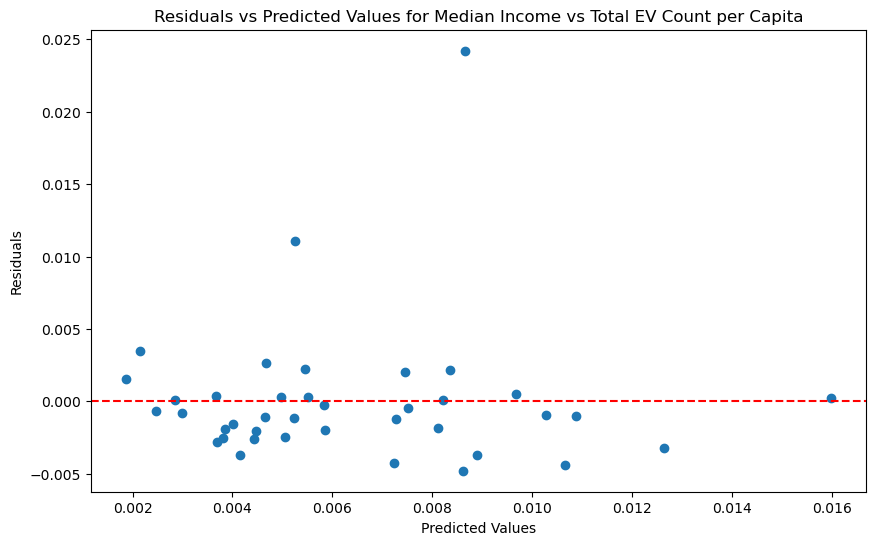

In [27]:
# Plot the residuals
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Median Income vs Total EV Count per Capita') 
plt.show()

The residuals does appear to be somewhat evenly distributed around the horizontal red line without a clear pattern. However, we do see some outliers within the plot. We can conduct a OLS Regression to gain more insights.

In [28]:
# OLS Regression
X_with_const = sm.add_constant(X)  
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     15.05
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000416
Time:                        18:05:40   Log-Likelihood:                 152.97
No. Observations:                  39   AIC:                            -301.9
Df Residuals:                      37   BIC:                            -298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0106      0.004     -2.387      0.0

### Interpretation
There is a statistically significant positive relationship between Median Income and EV Count per Capita. The regression results indicate that for every $1 increase in Median Income, the EV Count per Capita (per person) increases by approximately 2.215e-07 units. While the coefficient is very small due to the normalization of the dependent variable, the positive relationship supports the hypothesis that wealthier counties are more likely to adopt electric vehicles.

### Predictions
#### Regression Equation:
EV Count per Capita = -0.0106 + (2.215e-07) $\cdot$ Median Income


#### When Median Income = \$0:
EV Count per Capita = -0.0106 + (2.215e-07) $\cdot$ 0 = -0.0106
This result is unrealistic since income and EV count per capita cannot be negative, highlighting a limitation of the model.

#### When Median Income = \$100,000:
EV Count per Capita = -0.0106 + (2.215e-07) $\cdot$ 100,000 = -0.0106 + 0.02215 = 0.01155
At a median income of $100,000, the EV count per capita is predicted to be approximately 0.01155.

#### When Median Income = \$200,000:
EV Count per Capita = -0.0106 + (2.215e-07) $\cdot$ 200,000 = -0.0106 + 0.0443 = 0.0337
At a median income of $200,000, the EV count per capita is predicted to be approximately 0.0337.

As we can see with higher income, the EV count per capita or person does increase but not as much as we think. This could indicate that income does play a row in EV counts, but other factors probably contribute to EV counts, too.

### Potential Oddities
Negative Intercept: The intercept of -0.0106 suggests a negative EV Count per Capita when median income is $0, which is not realistic. This highlights the limitation of linear regression in scenarios where dependent variables cannot be negative.

Fractional EV Counts: The model predicts fractional EV registrations per capita, which is unrealistic since EV registrations are discrete values.

### Statistical Significance
P-value for Median Income Coefficient: The p-value for the Median Income coefficient is 0.000, which is highly significant (p < 0.05). This indicates that the relationship between median income and EV count per capita is unlikely due to random chance.

Confidence Interval: The 95% confidence interval for the coefficient is [1.06e-07, 3.37e-07], which does not include zero. This further confirms the statistical significance of the relationship.

R-squared Value (0.289): About 28.9% of the variation in EV count per capita is explained by Median Income. While this is a moderate level of explanation, it suggests that other factors (e.g., infrastructure, policy incentives, or urban density) also play a significant role in EV adoption.

F-statistic and Model Significance: The F-statistic of 15.05 (p = 0.000416) confirms that the model as a whole is statistically significant and that Median Income provides meaningful explanatory power for the dependent variable.

## Multivariate Regression
Can we better predict the total number of EV registrations in a county using multiple predictors, including BEV Proportion, Average Model Year, and Average Electric Range?

### Overall Model Hypothesis

Null Hypothesis ($H_0$): The model with predictors (BEV Proportion, Average Model Year, Average Electric Range) does not significantly explain variation in the dependent variable (Log EV Count). 

Alternative Hypothesis ($H_A$): The model with predictors (BEV Proportion, Average Model Year, Average Electric Range) significantly explains variation in the total EV registrations.

In [29]:
# Define the predictors (independent variables)
X = aggregated_df[["BEV Proportion", "Average Model Year", "Average Electric Range"]]

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Define the target (dependent variable)
y = aggregated_df["Total EV Count"]

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total EV Count   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.924
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.144
Time:                        18:05:40   Log-Likelihood:                -392.38
No. Observations:                  39   AIC:                             792.8
Df Residuals:                      35   BIC:                             799.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.04

### Interpretation
The model's R-squared value of 0.142 indicates that only 14.2% of the variation in total EV registrations is explained by these predictors, suggesting a weak overall fit. The p-value of the model in general is 0.05 (p = 0.05), indicating predictors collectively do not explain the variation in Total EV Count at a statistically significant level. We have failed to reject our null hypothesis. Individually, BEV Proportion has a significant positive coefficient (49,270.40, p = 0.035), implying that a higher proportion of BEVs strongly correlates with greater total EV registrations. In contrast, Average Model Year has a significant positive effect (coefficient = 5,179.70, p = 0.050), suggesting that newer average model years are associated with higher EV counts. However, Average Electric Range is not statistically significant (p = 0.154), indicating no strong evidence of its influence on total EV count. This indicates that unlike before where BEV proportion does not seem to play a role in EV registrations, when combined with model year and electric range, it holds some signficance.

In [30]:
# Perform linear regression
X = aggregated_df[["BEV Proportion", "Average Model Year", "Average Electric Range"]].values
y = aggregated_df["Total EV Count"].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for var, coef in zip(["BEV Proportion", "Average Model Year", "Average Electric Range"], coefficients):
    print(f"  {var}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

R-squared: 0.14
Coefficients:
  BEV Proportion: 49267.84
  Average Model Year: 5179.70
  Average Electric Range: -135.49
Intercept: -10463053.13


The R-squared value is 0.14, indicating that the model explains 14% of the variation in the Total EV Count. This is a relatively weak fit, suggesting that most of the variation in EV Count is not captured by these predictors. BEV proportion's coefficient is 49267.84, indicating that for every unit increase in BEV Proportion (e.g., from 0.5 to 0.6), Total EV Count increases by 49,267.84 units, holding other variables constant. Average Model Year's coefficient is 5179.90, indicating for every 1-year increase in Average Model Year (e.g., from 2018 to 2019), Total EV Count increases by 5,179.70 units, holding other variables constant. However, electric range's coefficient is -135.49, which is counterintutitive as higher electric range is typically considered an advantage for EV adoption. This result might suggest that other factors are more influential.

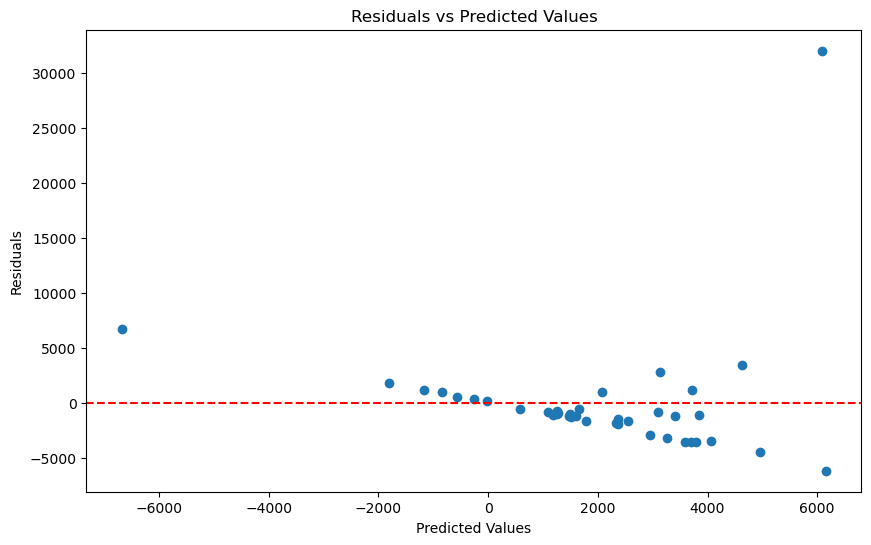

In [31]:
# Plot the residuals
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values') 
plt.show()

The residual indicates some sort of heteroscedasticity. The model's predictions might not be as reliable. To address this, we can apply a log transformation to Total EV Count.

In [32]:
# Linear Regression with Total EV Count log transformed
aggregated_df["Log EV Count"] = np.log(aggregated_df["Total EV Count"])
X = aggregated_df[["BEV Proportion", "Average Model Year", "Average Electric Range"]].values
y = aggregated_df["Log EV Count"]

model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.2f}")

print("Coefficients:")
for var, coef in zip(["BEV Proportion", "Average Model Year", "Average Electric Range"], coefficients):
    print(f"  {var}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

R-squared: 0.46
Coefficients:
  BEV Proportion: 49267.84
  Average Model Year: 5179.70
  Average Electric Range: -135.49
Intercept: -10463053.13


The R-squared value of 0.46 indicates that 46% of the variability in the log-transformed Total EV Count is explained by these predictors, suggesting a moderate fit for the model. A one-unit increase in BEV Proportion (e.g., moving from 0.5 to 0.6) corresponds to a proportional increase in the Total EV Count by a factor of e^(49,267.84). This indicates a multiplicative growth effect, meaning that counties with higher BEV proportions experience exponential growth in EV registrations. A one-year increase in Average Model Year corresponds to a proportional increase in Total EV Count by a factor of e^(5,179.70). This highlights that counties with newer EV fleets tend to adopt EVs at an accelerating rate. On the other hand, electric range's coefficient is negative, suggesting that other factors are more influential.

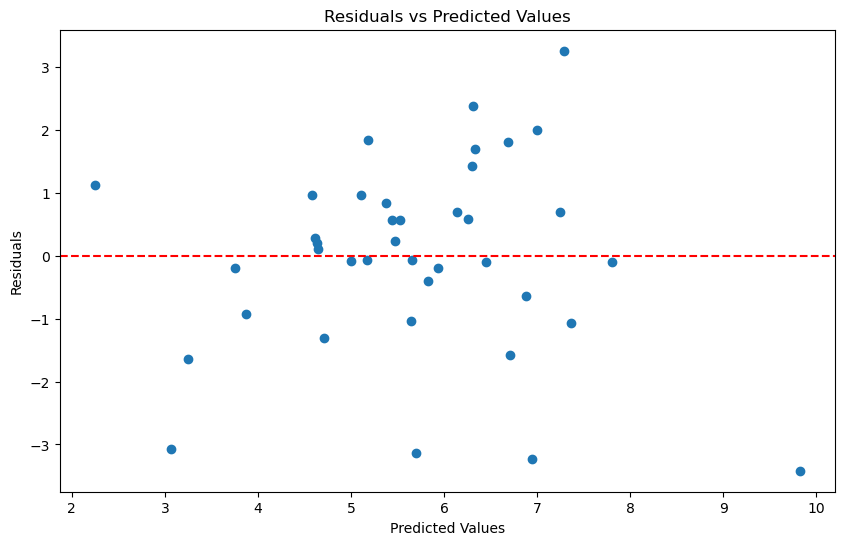

In [33]:
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values') 
plt.show()

### Overall Model Hypothesis

Null Hypothesis ($H_0$): None of the variables (BEV Proportion, Average Model Year, Average Electric Range) have a relationship with the dependent variable (Log EV Count). 

Alternative Hypothesis ($H_A$): The model with predictors (BEV Proportion, Average Model Year, Average Electric Range) significantly explains variation in the dependent variable (Log EV Count).

In [34]:
# Define the predictors (independent variables)
X = aggregated_df[["BEV Proportion", "Average Model Year", "Average Electric Range"]]

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Define the target (dependent variable)
y = aggregated_df["Log EV Count"]

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Log EV Count   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     10.04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.45e-05
Time:                        18:05:41   Log-Likelihood:                -71.610
No. Observations:                  39   AIC:                             151.2
Df Residuals:                      35   BIC:                             157.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2880

## Interpretation
The R-squared value of 0.463 indicates that 46.3% of the variability in the log-transformed EV Count is explained by these predictors, suggesting a moderate fit. Among the coefficients, BEV Proportion has a positive and significant relationship with the log-transformed EV Count, with a coefficient of 30.41 (p-value = 0.000), indicating that a one-unit increase in BEV Proportion results in a proportional increase in EV Count by a factor of e^(30.41), holding other variables constant. Average Model Year also has a positive coefficient of 1.43 (p-value = 0.044), meaning newer EV fleets are associated with a slight proportional increase in EV Count. Conversely, Average Electric Range has a negative coefficient of -0.12 (p-value = 0.000), showing a small but statistically significant inverse relationship with EV Count. The overall model is significant (p-value is 0.044, which is < 0.05), and the low p-values for individual predictors confirm their importance in explaining the variability in EV Count. However, the relatively moderate R-squared suggests additional factors not included in this model may also influence EV adoption.

This regression models the natural logarithm of Total EV Count ln(y) as a linear function of BEV Proportion $(x_1)$, Average Model Year $(x_2)$, and Average Electric Range $(x_3)$.  
Intercept (−2880.9235): This represents the baseline value of ln(Total EV Count) when all predictors are set to zero. However, this value is not directly interpretable in this context as zero values for predictors like Average Model Year or Average Electric Range are nonsensical.  


BEV Proportion $(x_1)$ Coefficient: 30.4065.  
Total EV Count is expected to be multiplied by $e^{30.4065}$ for a 1-unit increase in BEV Proportion (from 0% to 100% BEV).  
Average Model Year $(x_2)$ Coefficient: 1.4296  
Total EV Count is expected to be multiplied by $e^{1.4296}$ for a 1-unit increase in Average Model Year.  
Average Electric Range $(x_3)$ Coefficient: −0.1231  
Total EV Count is expected to be multiplied by $e^{−0.1231}$ for a 1-unit increase in Average Model Year.   

## Prediction
$(\text{Total EV Count}) = \text{Intercept} + \beta_1 \cdot \text{BEV Proportion} + \beta_2 \cdot \text{Average Model Year} + \beta_3 \cdot \text{Average Electric Range}$  
When BEV Proportion = 0 (Assuming average Model Year = 2020 and Average Electric Range = 134):  
$\ln(\text{Total EV Count}) = -2880.9235 + 30.4065 \cdot 0 + 1.4296 \cdot 2020 - 0.1231 \cdot 134$  
$\ln(\text{Total EV Count}) = -2880.9235 + 0 + 2880.792 - 16.4974$  
$\ln(\text{Total EV Count}) = -16.629$  
$\text{Total EV Count} = e^{-16.629} \approx 0$

The total EV count prediction is effectively 0, which might not align with real-world data since a county with no BEVs could still have PHEVs.

When BEV Proportion = 1 (Assuming average Model Year = 2020 and Average Electric Range = 200):
$\ln(\text{Total EV Count}) = -2880.9235 + 30.4065 \cdot 1 + 1.4296 \cdot 2020 - 0.1231 \cdot 134$  
$\ln(\text{Total EV Count}) = -2880.9235 + 30.4065 + 2880.792 - 16.4974$  
$\ln(\text{Total EV Count}) = 14.278$  
$\text{Total EV Count} = e^{14.278} \approx 1,566,500$

The total EV count is estimated to be 1,566,500, which seems unrealistically high and may indicate model limitations.

## Potential Oddities
The model assumes a linear relationship between the independent variables (e.g., BEV Proportion, Average Model Year, Average Electric Range) and the log-transformed dependent variable. However, the relationship between EV registrations and these factors may be non-linear in reality.  
The model does not account for potential interactions between variables (e.g., the relationship between BEV Proportion and Average Electric Range), which may jointly influence the Total EV Count in ways that are not captured in this regression.  
The coefficient for Average Model Year (1.4296) implies a significant increase in Total EV Count as model years increase, but this relationship may be confounded by other variables, such as technology adoption rates or socioeconomic factors not included in the model.  

## Summary of Results
The regression analysis for Pre-Registration 1 suggests that there is no significant relationship between the proportion of BEVs and the total EV registrations in a county. The p-value for the BEV Proportion coefficient (0.631) is too large to reject the null hypothesis, and the very low R-squared value indicates that BEV Proportion explains almost none of the variation in Total EV Count. Therefore, we conclude that BEV density is not a strong standalone predictor of overall EV registrations.
  
The regression analysis for Pre-Registration 2 demonstrates a positive relationship between median income and EV registrations. Counties with higher median incomes tend to register more EVs. The R-squared value indicates that median income accounts for a substantial proportion of the variation in EV registrations, although other factors likely contribute as well. This finding supports the hypothesis and suggests that income is an important factor influencing EV adoption trends. When population is added on with income, there does not seem to be a significant relationship between population + median income and EV registrations, indicating population might not play a role in EV registrations, though doing a linear regression between just population and EV registrations can tell us more.

In summary, while BEV density was not a significant factor in isolation, when combined with Model Year and Electric Range, it became a meaningful predictor in the context of the multivariate regression model. The Model Year of vehicles provides critical insights into consumer adoption of newer, more advanced technologies. BEVs with newer model years tend to have longer ranges, include better features, such as faster charging and improved performance, and be more desirable to consumers, which might explain their prevalence in higher BEV density areas. Combining BEV density with model year allows us to infer whether high BEV density is tied to newer vehicles. This is useful for manufacturers aiming to release features that appeal to potential buyers. Additionally, the range of an electric vehicle is one of the most significant barriers to adoption due to "range anxiety" (the fear of running out of battery without access to a charger). Newer model year vehicles tend to have higher electric range. This might indicate that places with higher BEV adoption might tend to have newer vehicles with higher electric range. Users might tend to get these vehicles to reduce the dependency on a dense charging network, indicating infrastructure might play a role in EV adoption, too. This analysis underscores the complex interplay of vehicle type, technology, and region-specific factors in shaping EV adoption. In order for policymakers to promote higher EV adoptions, they might have to look more into policies that allow this. Policies promoting trade-ins for older vehicles and subsidies for newer BEV models can accelerate EV adoption. Subsidizing longer-range vehicles or investing in infrastructure (e.g., charging stations) can address range anxiety, especially in regions with lower BEV density. Regions with lower incomes that cannot afford newer BEVs or EVs can still benefit from this policy by adopting older EVs. With more charging infrastructure, "range anxiety" will decrease and lead to higher consumer confidence in EVs.

## Limitations
1. The regression model predicts fractional EV registrations, which is not realistic since registrations are discrete values.  
2. Counties with small populations or unique geographic conditions may skew the results. For example, a county with high BEV density but low total EV registrations due to a small population could distort the perceived relationship.  
3. The data represents a section in time, making it difficult to assess trends or causality. EV adoption patterns may evolve with new policies, technological advancements, or economic changes. Additionally, for the electric vehicle dataset, we do not know which year each vehicle was registered or when the owner bought the vehicle. We utilize the median income and population from year 2023 for each county, which might be a limitation, especially if certain vehicles were not bought in 2023.
4. Another limitation of our project is the small size of the dataset we used. This may have impacted the clarity of our residual plots, as the limited number of data points makes it harder to identify clear patterns or assess heteroskedasticity accurately. With only 39 observations, the dataset provides a relatively small sample size for building and evaluating our model, which could influence the reliability and robustness of our results.


## Acknowledgements and Bibliography
### Tools and Libraries
- Python libraries: pandas, numpy, matplotlib, seaborn, statsmodels, and scikit-learn.

### Data Sources
- Washington State Department of Licensing. (n.d.). *Electric vehicle population data*. Retrieved from https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-population
- Washington State Office of Financial Management. (2023). *Median household income estimates by county: 1989 to 2021*. Retrieved from https://ofm.wa.gov/washington-data-research/economy-and-labor-force/median-household-income-estimates

### Research Sources
1. U.S. Environmental Protection Agency. (2020). *Fast facts on transportation greenhouse gas emissions*. Retrieved from https://www.epa.gov/greenvehicles/fast-facts-transportation-greenhouse-gas-emissions
2. Muehlegger, E. (2019). *Mass electric vehicle adoption*. Retrieved from https://www.erichmuehlegger.com/Working%20Papers/MR_Mass_EV_Adoption.pdf
3. Sierzchula, W., Bakker, S., Maat, K., & van Wee, B. (2014). A review of consumer preferences of and interactions with electric vehicle charging infrastructure. *ResearchGate*. Retrieved from https://www.researchgate.net/publication/324476046_A_review_of_consumer_preferences_of_and_interactions_with_electric_vehicle_charging_infrastructure
4. InsideEVs. (2023). *PHEV growth overtakes BEVs in report*. Retrieved from https://insideevs.com/news/724181/phev-growth-overtakes-bevs-report/
5. Grappone Honda. (n.d.). *BEV vs. PHEV eco-friendliness*. Retrieved from https://www.grapponehonda.com/finance/car-buying-tips/bev-vs-phev/#:~:text=Environmental%20Impact%3A%20For%20those%20looking,when%20using%20a%20gasoline%20engine

## Question for Reviewers
1) Should we look into more factors for Phase V?
2) How should we incorporate brands since the type for brands is string and not an int or some sort of numerical values? Should we utilize logistic regression?